<a href="https://colab.research.google.com/github/ayescafati/redes-neuronales-2025/blob/main/redes_neuronales_2025_guia_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendiendo Fashion-MNIST con PyTorch

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [5]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

In [6]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [7]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [8]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [9]:
# 1.4)
import google.colab
from google.colab import files

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores de los pixeles) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [10]:
# 2.1)
# Define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,), (0.5,))
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

# Download and load the training data
train_set = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.93MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 134kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.57MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.4MB/s]


In [11]:
# 2.2)
len(train_set), len(valid_set)

(60000, 10000)

In [26]:
i = np.random.randint(len(train_set))
print(f"i={i}")
image, label = train_set[i]

i=3717


In [28]:
label # Cada prenda pertenece a una de las 10 categorías entre 0 y 9

0

In [30]:
# image

In [40]:
image.shape

torch.Size([1, 28, 28])

In [41]:
image.numpy()

array([[[-1.        , -1.        , -1.        , -1.        ,
         -0.99215686, -1.        , -1.        , -1.        ,
         -1.        , -0.7882353 , -0.18431371,  0.35686278,
          0.9372549 ,  0.33333337, -0.00392157,  0.00392163,
          0.05098045,  0.32549024,  0.96862745,  0.41960788,
         -0.1607843 , -0.7176471 , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -0.99215686,
         -0.9843137 , -1.        , -1.        , -0.7176471 ,
          0.5686275 ,  0.73333335,  0.6627451 ,  0.5921569 ,
          0.7490196 ,  0.92941177,  0.94509804,  1.        ,
          0.9529412 ,  0.8509804 ,  0.827451  ,  0.64705884,
          0.6784314 ,  0.7176471 ,  0.654902  , -0.6313726 ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -0.99215686, -1.        , -0.8666667 ,  0.5921569 ,
          0.62352943, 

In [42]:
image.numpy().squeeze()

array([[-1.        , -1.        , -1.        , -1.        , -0.99215686,
        -1.        , -1.        , -1.        , -1.        , -0.7882353 ,
        -0.18431371,  0.35686278,  0.9372549 ,  0.33333337, -0.00392157,
         0.00392163,  0.05098045,  0.32549024,  0.96862745,  0.41960788,
        -0.1607843 , -0.7176471 , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -0.99215686, -0.9843137 ,
        -1.        , -1.        , -0.7176471 ,  0.5686275 ,  0.73333335,
         0.6627451 ,  0.5921569 ,  0.7490196 ,  0.92941177,  0.94509804,
         1.        ,  0.9529412 ,  0.8509804 ,  0.827451  ,  0.64705884,
         0.6784314 ,  0.7176471 ,  0.654902  , -0.6313726 , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -0.99215686,
        -1.        , -0.8666667 ,  0.5921569 ,  0.62352943,  0.5921569 ,
         0.8039216 ,  0.7960

In [39]:
image.numpy().squeeze().shape

(28, 28)

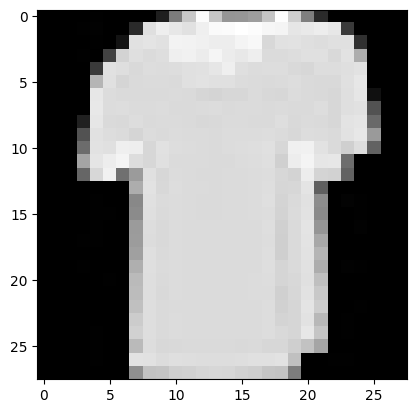

In [43]:
# Graficamos la imagen
plt.imshow(image.squeeze(), cmap="Greys_r")

In [45]:
# 2.3)
labels_names = {
    0: "T-shirt",  # Remera de manga corta
    1: "Trouser",  # Pantalón
    2: "Pullover", # Buzo
    3: "Dress",    # Vestido
    4: "Coat",     # Abrigo
    5: "Sandal",   # Sandalia
    6: "Shirt",    # Remera manga larga
    7: "Sneaker",  # Zapatilla
    8: "Bag",      # Bolso
    9: "Ankle boot" # Bota
}

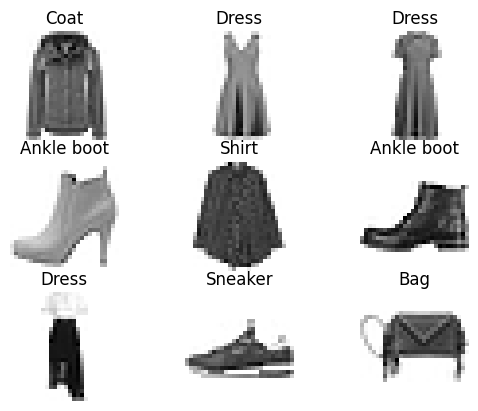

In [50]:
# 2.4)
figure = plt.figure()
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    j = torch.randint(high=len(train_set), size=(1,)).item()  # Los números aleatorios también se pueden generar desde pytorch. Útil para trabajar en la GPU
    image, label = train_set[j]
    figure.add_subplot(rows, cols, i)                         # comas, no punto
    plt.title(labels_names[label.item()] if torch.is_tensor(label) else labels_names[label])
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray_r")                 # imshow + cmap correcto
plt.show()


## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [51]:
# 3.1)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = 100, shuffle = True)

In [53]:
len(train_loader.dataset) # num samples

60000

In [55]:
len(train_loader) # num batches

600

In [56]:
# 3.2)
train_iter = iter(train_loader)
images, labels = next(train_iter)
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


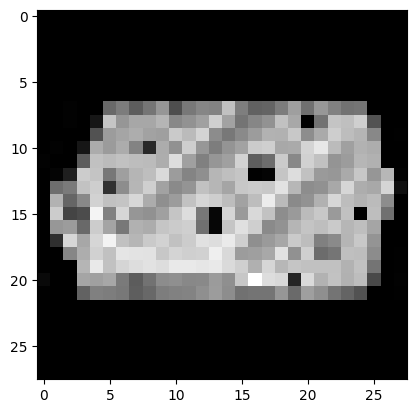

In [57]:
# Examinamos una imagen
plt.imshow(images[1].squeeze(),cmap='Greys_r')

In [58]:
images[0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -0.9922, -1.0000, -0.6627,  0.0510, -0.1843,
          -0.4039, -0.2235, -0.9686, -1.0000, -0.9922, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -0.9922, -0.9686,
          -1.0000, -1.0000, -1.0000, -1.0000,  0.8980,  0.7098,  0.6314,
           0.5294,  0.8118,  0.2314, -1.0000, -1.0000, -1.0000, -0.9922,
          -0.9843, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -0.9922, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9294, -0.0431,  0.8824,  0.6627,  0.4902,  0.5137,
           0.5216,  0.5373,  0.4510,  0.1373, -0.5686, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7412,
           0.2314,  0.6549,  0.6863,  0.6235,  0

In [59]:
images[0].numpy()

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -0.99215686, -1.        , -0.6627451 ,
          0.05098045, -0.18431371, -0.40392154, -0.2235294 ,
         -0.96862745, -1.        , -0.99215686, -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -0.99215686, -0.99215686, -0.96862745, -1.        ,
         -1.        , -1.        , -1.        ,  0.8980392 ,
          0.70980394,  0.6313726 ,  0.5294118 ,  0.8117647 ,
          0.2313726 , -1.        , -1.        , -1.        ,
         -0.99215686, -0.9843137 , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -0.99215686,
         -1.        , -1.        , -1.        , -1.        ,
         -0.92941177, 

In [60]:
images[0].numpy().shape

(1, 28, 28)

In [65]:
images[0].squeeze().shape

torch.Size([28, 28])

In [63]:
labels

tensor([0, 8, 1, 6, 0, 6, 0, 7, 8, 6, 1, 9, 0, 7, 4, 4, 1, 3, 9, 7, 2, 3, 7, 9,
        3, 4, 3, 9, 2, 3, 0, 5, 9, 8, 9, 8, 0, 8, 0, 2, 0, 7, 0, 0, 2, 4, 7, 6,
        5, 9, 5, 8, 6, 7, 7, 6, 6, 2, 0, 3, 0, 9, 9, 0, 5, 2, 7, 2, 9, 0, 1, 0,
        5, 2, 2, 4, 3, 8, 5, 1, 3, 9, 0, 1, 5, 6, 7, 3, 1, 7, 1, 3, 4, 4, 6, 5,
        7, 1, 2, 7])

In [64]:
labels.numpy()

array([0, 8, 1, 6, 0, 6, 0, 7, 8, 6, 1, 9, 0, 7, 4, 4, 1, 3, 9, 7, 2, 3,
       7, 9, 3, 4, 3, 9, 2, 3, 0, 5, 9, 8, 9, 8, 0, 8, 0, 2, 0, 7, 0, 0,
       2, 4, 7, 6, 5, 9, 5, 8, 6, 7, 7, 6, 6, 2, 0, 3, 0, 9, 9, 0, 5, 2,
       7, 2, 9, 0, 1, 0, 5, 2, 2, 4, 3, 8, 5, 1, 3, 9, 0, 1, 5, 6, 7, 3,
       1, 7, 1, 3, 4, 4, 6, 5, 7, 1, 2, 7])

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [67]:
# 4)
# Forma 1
class NeuralNetwork(nn.Module):
    def __init__(self, n1, n2, p=0.2):
        super(NeuralNetwork, self).__init__()
        # Capa 0
        self.flatten = nn.Flatten()  # "capa" flatten
        # Capa 1
        self.fc1 = nn.Linear(28*28, n1)  # fc1 = "capa" fully connected 1
        self.relu = nn.ReLU()            # modulo relu 1
        self.dropo = nn.Dropout(p)       # modulo dropout 1
        # Capa 2
        self.fc2 = nn.Linear(n1, n2)     # fc2 = "capa" fully connected 2
        self.relu = nn.ReLU()            # modulo relu 2
        self.dropo = nn.Dropout(p)       # modulo dropout 2
        # Capa 3
        self.fc3 = nn.Linear(n2, 10)     # fc3 = "capa" fully connected 3

    def forward(self, x):
        # Capa 0
        x = self.flatten(x)
        # Capa 1
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropo(x)
        # Capa 2
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropo(x)
        # Capa 3
        x = self.fc3(x)
        return x

In [68]:
mi_red = NeuralNetwork(128, 64)
mi_red(image).shape

torch.Size([1, 10])

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [70]:
# 5.1)
# Definimos la función de entrenamiento
def train_loop(dataloader, model, loss_fn, optimizer):
    # Activamos la maquinaria de entrenamiento del modelo
    model.train()

    # Definimos ciertas constantes
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_loss = 0
    sum_correct = 0
    sum_samples = 0

    # Iteramos sobre lotes (batches)
    for batch, (X, y) in enumerate(dataloader):
        # Copiamos las entradas y las salidas al dispositivo de trabajo
        X = X.to(device)
        y = y.to(device)

        batch_size = len(X)  # number of samples in the batch
        sum_samples += batch_size

        # Calculamos la predicción del modelo y la correspondiente función perdida
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagamos usando el optimizador provisto.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculamos la pérdida promedio del batch y lo agregamos a una suma correspondiente.
        sum_loss += loss.item() * batch_size
        # También calculamos el número de predicciones correctas en el batch y lo agregamos a una suma correspondiente.
        sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Reportamos el progreso
        if batch % (num_batches // 10) == 0:
            avrg_loss = sum_loss / sum_samples
            precision = sum_correct / sum_samples
            print(f"@train_loop batch:{batch:5d}  avrg_loss={avrg_loss:>7f}  processed-samples={(100*sum_samples/num_samples):>5.1f}%")

    assert num_samples == sum_samples
    avrg_loss = sum_loss/sum_samples
    precision = sum_correct/sum_samples
    return avrg_loss, precision

In [71]:
# 5.2)
# Definimos la función de validación
def eval_loop(dataloader, model, loss_fn):
    # Desactivamos la maquinaria de entrenamiento del modelo
    model.eval()

    # Definimos ciertas constantes
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_loss = 0
    sum_correct = 0
    sum_samples = 0

    # Para testear, desactivamos el cálculo de gradientes.
    with torch.no_grad():
        # Iteramos sobre lotes (batches)
        for X, y in dataloader:
            # Copiamos las entradas y las salidas al dispositivo de trabajo
            X = X.to(device)
            y = y.to(device)

            batch_size = len(X)  # number of samples in the batch
            sum_samples += batch_size

            # Calculamos las predicciones del modelo...
            pred = model(X)
            loss = loss_fn(pred, y)

            # Calculamos la pérdida promedio del batch y lo agregamos a una suma correspondiente.
            sum_loss += loss.item() * batch_size
            # También calculamos el número de predicciones correctas en el batch y lo agregamos a una suma correspondiente.
            sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calculamos la pérdida total y la fracción de clasificaciones correctas, y las imprimimos
    assert sum_samples == num_samples
    avrg_loss = sum_loss / sum_samples
    precision = sum_correct / sum_samples
    print(f"@eval_loop avg_loss={avrg_loss:>8f} precision={(100*precision):>0.1f}%")
    return avrg_loss, precision

In [72]:
# 5.3)
# Creamos los DataLoaders
batch_size = 100
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)

In [73]:
# 5.4)
# Creamos una instancia de una función de pérdida... una cross-entropy-loss en este caso.
loss_fm = nn.CrossEntropyLoss()

In [74]:
# 5.5)
n1 = 128
n2 = 64
p = 0.2
model = NeuralNetwork(n1, n2, p=p)

In [75]:
# 5.6)
# Creamos un optimizador, un Stochastic Gradient Descent, en este caso.
learning_rate = 1e-3  # necesario para definir
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=1e-08, weight_decay=0, amsgrad=False)

In [76]:
# 5.7)
# Determinamos en qué dispositivo vamos a trabajar, una CPU o una GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Pasamos el modelo al dispositivo
model = model.to(device)

In [78]:
# 5.8) y 5.9)
# Finalmente, entrenamos iterando sobre épocas.
# Además, testeamos el modelo en cada una de ellas.
num_epochs = 30
list_train_avg_loss_incorrecta = []
list_train_avg_loss            = []
list_valid_avg_loss            = []
list_train_precision_incorrecta = []
list_train_precision            = []
list_valid_precision            = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n------------------------------------")
    train_avg_loss_incorrecta, train_precision_incorrecta = train_loop(train_loader, model, loss_fn, optimizer)
    train_avg_loss, train_precision = eval_loop(train_loader, model, loss_fn)
    valid_avg_loss, valid_precision = eval_loop(valid_loader, model, loss_fn)

    list_train_avg_loss_incorrecta.append(train_avg_loss_incorrecta)
    list_train_avg_loss.append(train_avg_loss)
    list_valid_avg_loss.append(valid_avg_loss)
    list_train_precision_incorrecta.append(train_precision_incorrecta)
    list_train_precision.append(train_precision)
    list_valid_precision.append(valid_precision)

print("Done!")

Epoch 1
------------------------------------


NameError: name 'loss_fn' is not defined